In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as py
import matplotlib.pyplot as plot
import seaborn as sns
from matplotlib import rc

import matplotlib.mlab as mlab

In [2]:
pd.set_option("display.max_rows", 100)

In [3]:
dfMain = pd.read_csv('main.csv', low_memory=False);
#Loads 'main.csv'

In [4]:
dfMain = dfMain.filter(['mainid','brgy','roof','wall']);
# Filters the dataframe to show only the relevant columns for this scoring phase

dfMain

,mainid,brgy,roof,wall
0,1061066,186,4,4
1,555683,69,1,1
2,8611889,1,1,1
3,299398,165,4,4
4,136921,135,6,6
5,3842267,43,4,4
6,899855,201,1,1
7,235953,190,1,1
8,1591438,47,4,4
9,1053432,130,1,1


In [5]:
divisor = 1 / 6
print(divisor)

for i, row in dfMain.iterrows():
    roofScore = 0
    wallScore = 0
    if (row['roof'] == 1) :
        roofScore = divisor * 6
    elif (row['roof'] == 2) :
        roofScore = divisor * 4
    elif (row['roof'] == 3) :
        roofScore = divisor * 1
    elif (row['roof'] == 4) :
        roofScore = divisor * 5
    elif (row['roof'] == 5) :
        roofScore = divisor * 3
    elif (row['roof'] == 6) :
        roofScore = divisor * 2
        
    if (row['wall'] == 1) :
        wallScore = divisor * 6
    elif (row['wall'] == 2) :
        wallScore = divisor * 4
    elif (row['wall'] == 3) :
        wallScore = divisor * 1
    elif (row['wall'] == 4) :
        wallScore = divisor * 5
    elif (row['wall'] == 5) :
        wallScore = divisor * 3
    elif (row['wall'] == 6) :
        wallScore = divisor * 2
    
    dfMain.at[i,'finalScore'] = (roofScore + wallScore) / 2

dfMain

0.16666666666666666


,mainid,brgy,roof,wall,finalScore
0,1061066,186,4,4,0.833333
1,555683,69,1,1,1.000000
2,8611889,1,1,1,1.000000
3,299398,165,4,4,0.833333
4,136921,135,6,6,0.333333
5,3842267,43,4,4,0.833333
6,899855,201,1,1,1.000000
7,235953,190,1,1,1.000000
8,1591438,47,4,4,0.833333
9,1053432,130,1,1,1.000000


In [6]:
arrayBrgyScores = dfMain.groupby('brgy')['finalScore'].mean()

#Top20
arrayBrgyScorestop20 = dfMain.groupby('brgy')['finalScore'].mean().reset_index()
arrayBrgyScorestop20 = arrayBrgyScorestop20.sort_values('finalScore', ascending=False).head(20)
arrayBrgyScorestop20

,brgy,finalScore
96,114,1.000000
52,58,1.000000
37,40,1.000000
45,49,1.000000
95,113,1.000000
16,17,1.000000
48,52,1.000000
50,56,1.000000
115,141,1.000000
74,84,1.000000


In [7]:
#Bottom20
arrayBrgyScoresbot20 = dfMain.groupby('brgy')['finalScore'].mean().reset_index()
arrayBrgyScoresbot20 = arrayBrgyScoresbot20.sort_values('finalScore').head(20)
arrayBrgyScoresbot20

,brgy,finalScore
28,29,0.500000
63,73,0.561667
65,75,0.589888
49,54,0.612745
150,176,0.666667
60,68,0.675000
64,74,0.677704
61,69,0.683211
11,12,0.686971
30,31,0.711538


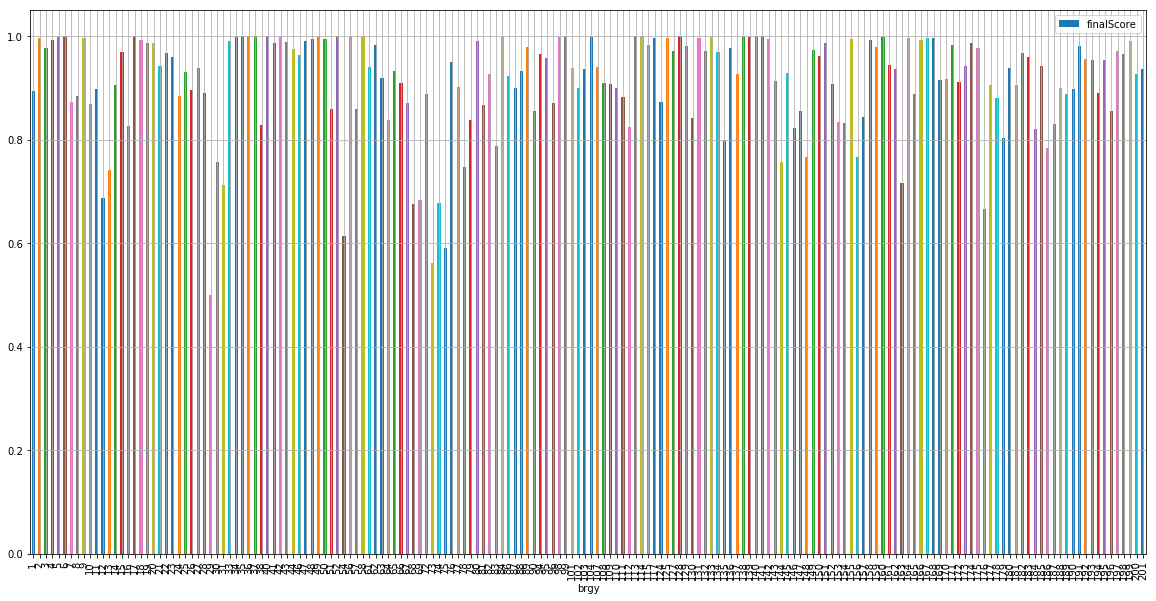

In [8]:
arrayBrgyScores.plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
plot.legend()
plot.show()

# Shows the home material score for each brgy arranged by the brgy # for easy referencing based on brgy #

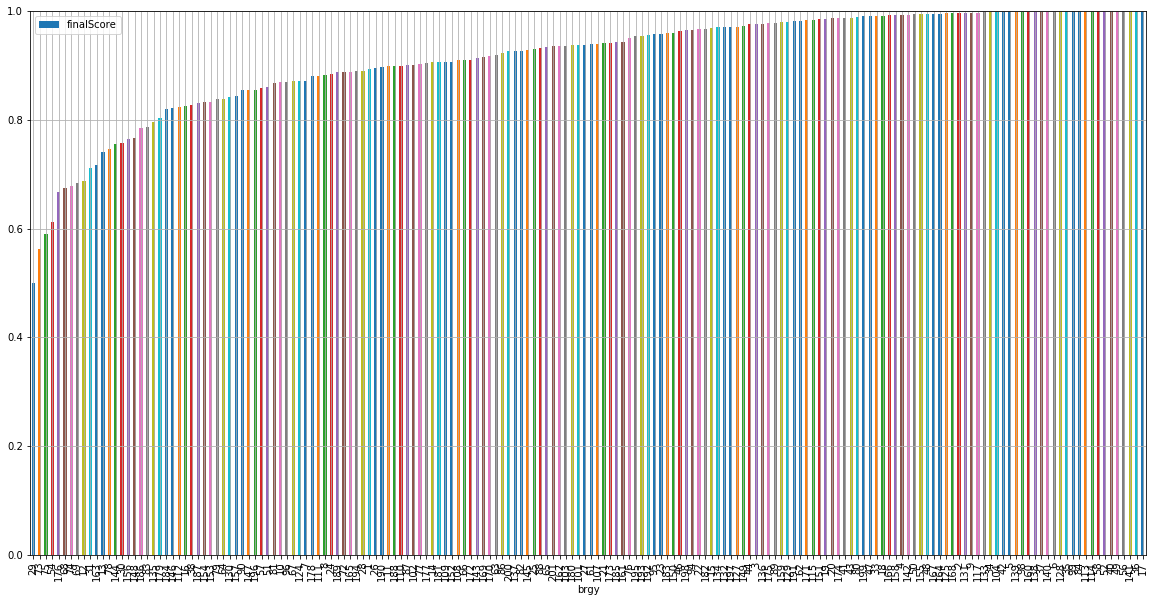

In [9]:
arrayBrgyScores.sort_values().plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
plot.ylim(0,1)
plot.legend()
plot.show()

# Graphs the same data as above but sorted in ascending order to better illustrate the trend
# And to also better see the differences of the values, especially the bottom score and the highest score.

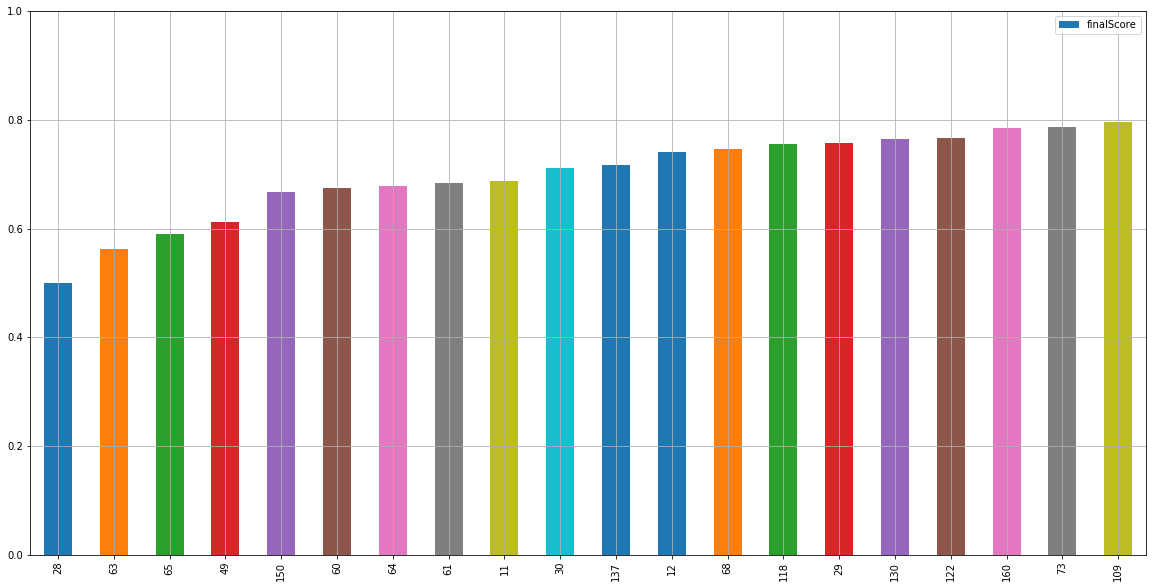

In [10]:
#Bar Graph for bottom 20
arrayBrgyScoresbot20['finalScore'].plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
plot.ylim(0,1)
plot.legend()
plot.show()

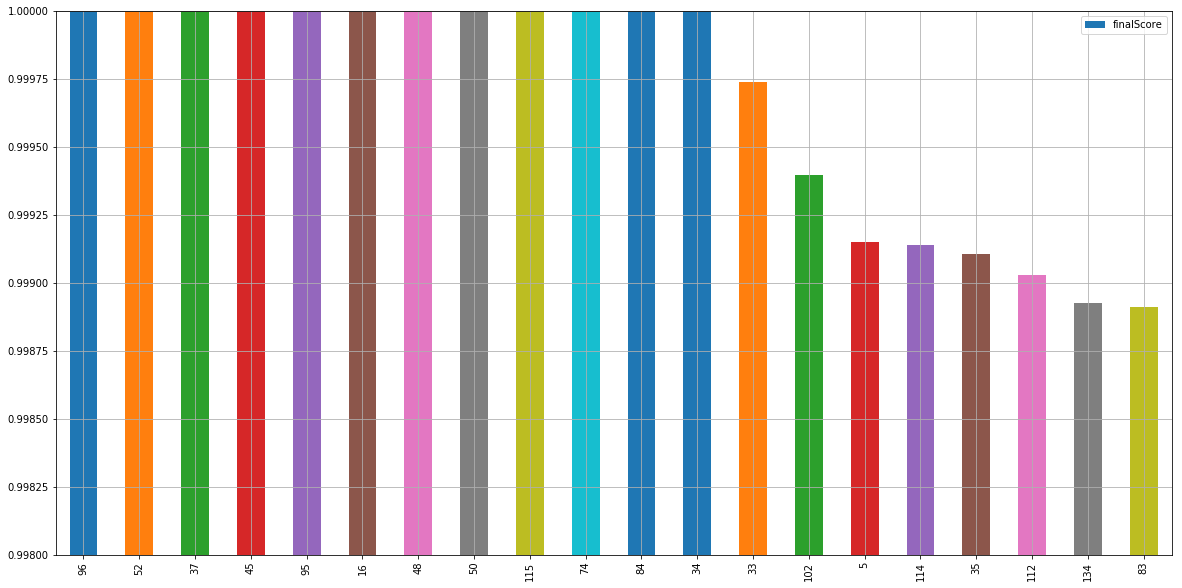

In [11]:
#Bar Graph for top 20
arrayBrgyScorestop20['finalScore'].plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
plot.ylim(0.998,1)
# Since the lowest score in the top 20 is 0.998911 by Brgy 83, the top 20 scores will be too close to 1.0
# to differentiate from each other. This is why we put this y-axis range to better illustrate it.
plot.legend()
plot.show()

In [12]:
dfScore4 = pd.DataFrame(arrayBrgyScores);
dfScore4.to_csv('BrgyScore4.csv', encoding='utf-8')
# Saves the score data into a CSV file so we can load it in the FINAL scoring notebook

# Calamity Prep Score 4: The Mean House Sturdiness of Each Barangay

### Assumptions: 
1. For the quality of the walls and roofs, we assumed that the ones with 'mixed' are just a step lower than their "non-mixed" counterparts because it is stated that they are predominantly strong, light, and salvaged.
    
### Methodology:
1. Created a filtered dataframe copy of the original Main.CSV file that only contains the relevant variables for Score 4.

2. Created a multiplier variable in which its value is calculated by how each entity (construction materials) will have equally distanced scoring from each other. Since there are 6 entities for each (strong, light, salvaged, mixed but predominantly strong, mixed but predominantly light, and mixed but predominantly salvaged), the formula will be 1 divided by 6.

3. Scored the sturdiness of each family's house by multiplying the materials of their roofs and walls by the multiplier. The ranking is shown below (1 as the highest, 6 as the lowest):

    1 - Strong materials

    2 - Mixed but predominantly strong

    3 - Light materials

    4 - Mixed but predominantly light

    5 - Salvaged/makeshift materials

    6 - Mixed but predominantly salvaged

   The final score is then calculated by getting the average of the wall and roof scores.


4. Each family's house sturdiness scores will then be grouped together according to barangay they belong in. Then, the mean of all those scores will be computed, leading to the final score of house sturdiness of a barangay.
